### 1. Visualize the data as a graph

In [9]:
import pandas as pd 
import numpy as np 
data = pd.read_csv(r"E:\Mtech\Sem 1\21DS603-Data Stru\Assignment\asoiaf-all-edges.csv")

In [10]:
data.head()

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3


In [11]:
import networkx as nx
df = nx.from_pandas_edgelist(data, source='Source', target='Target', edge_attr=True)

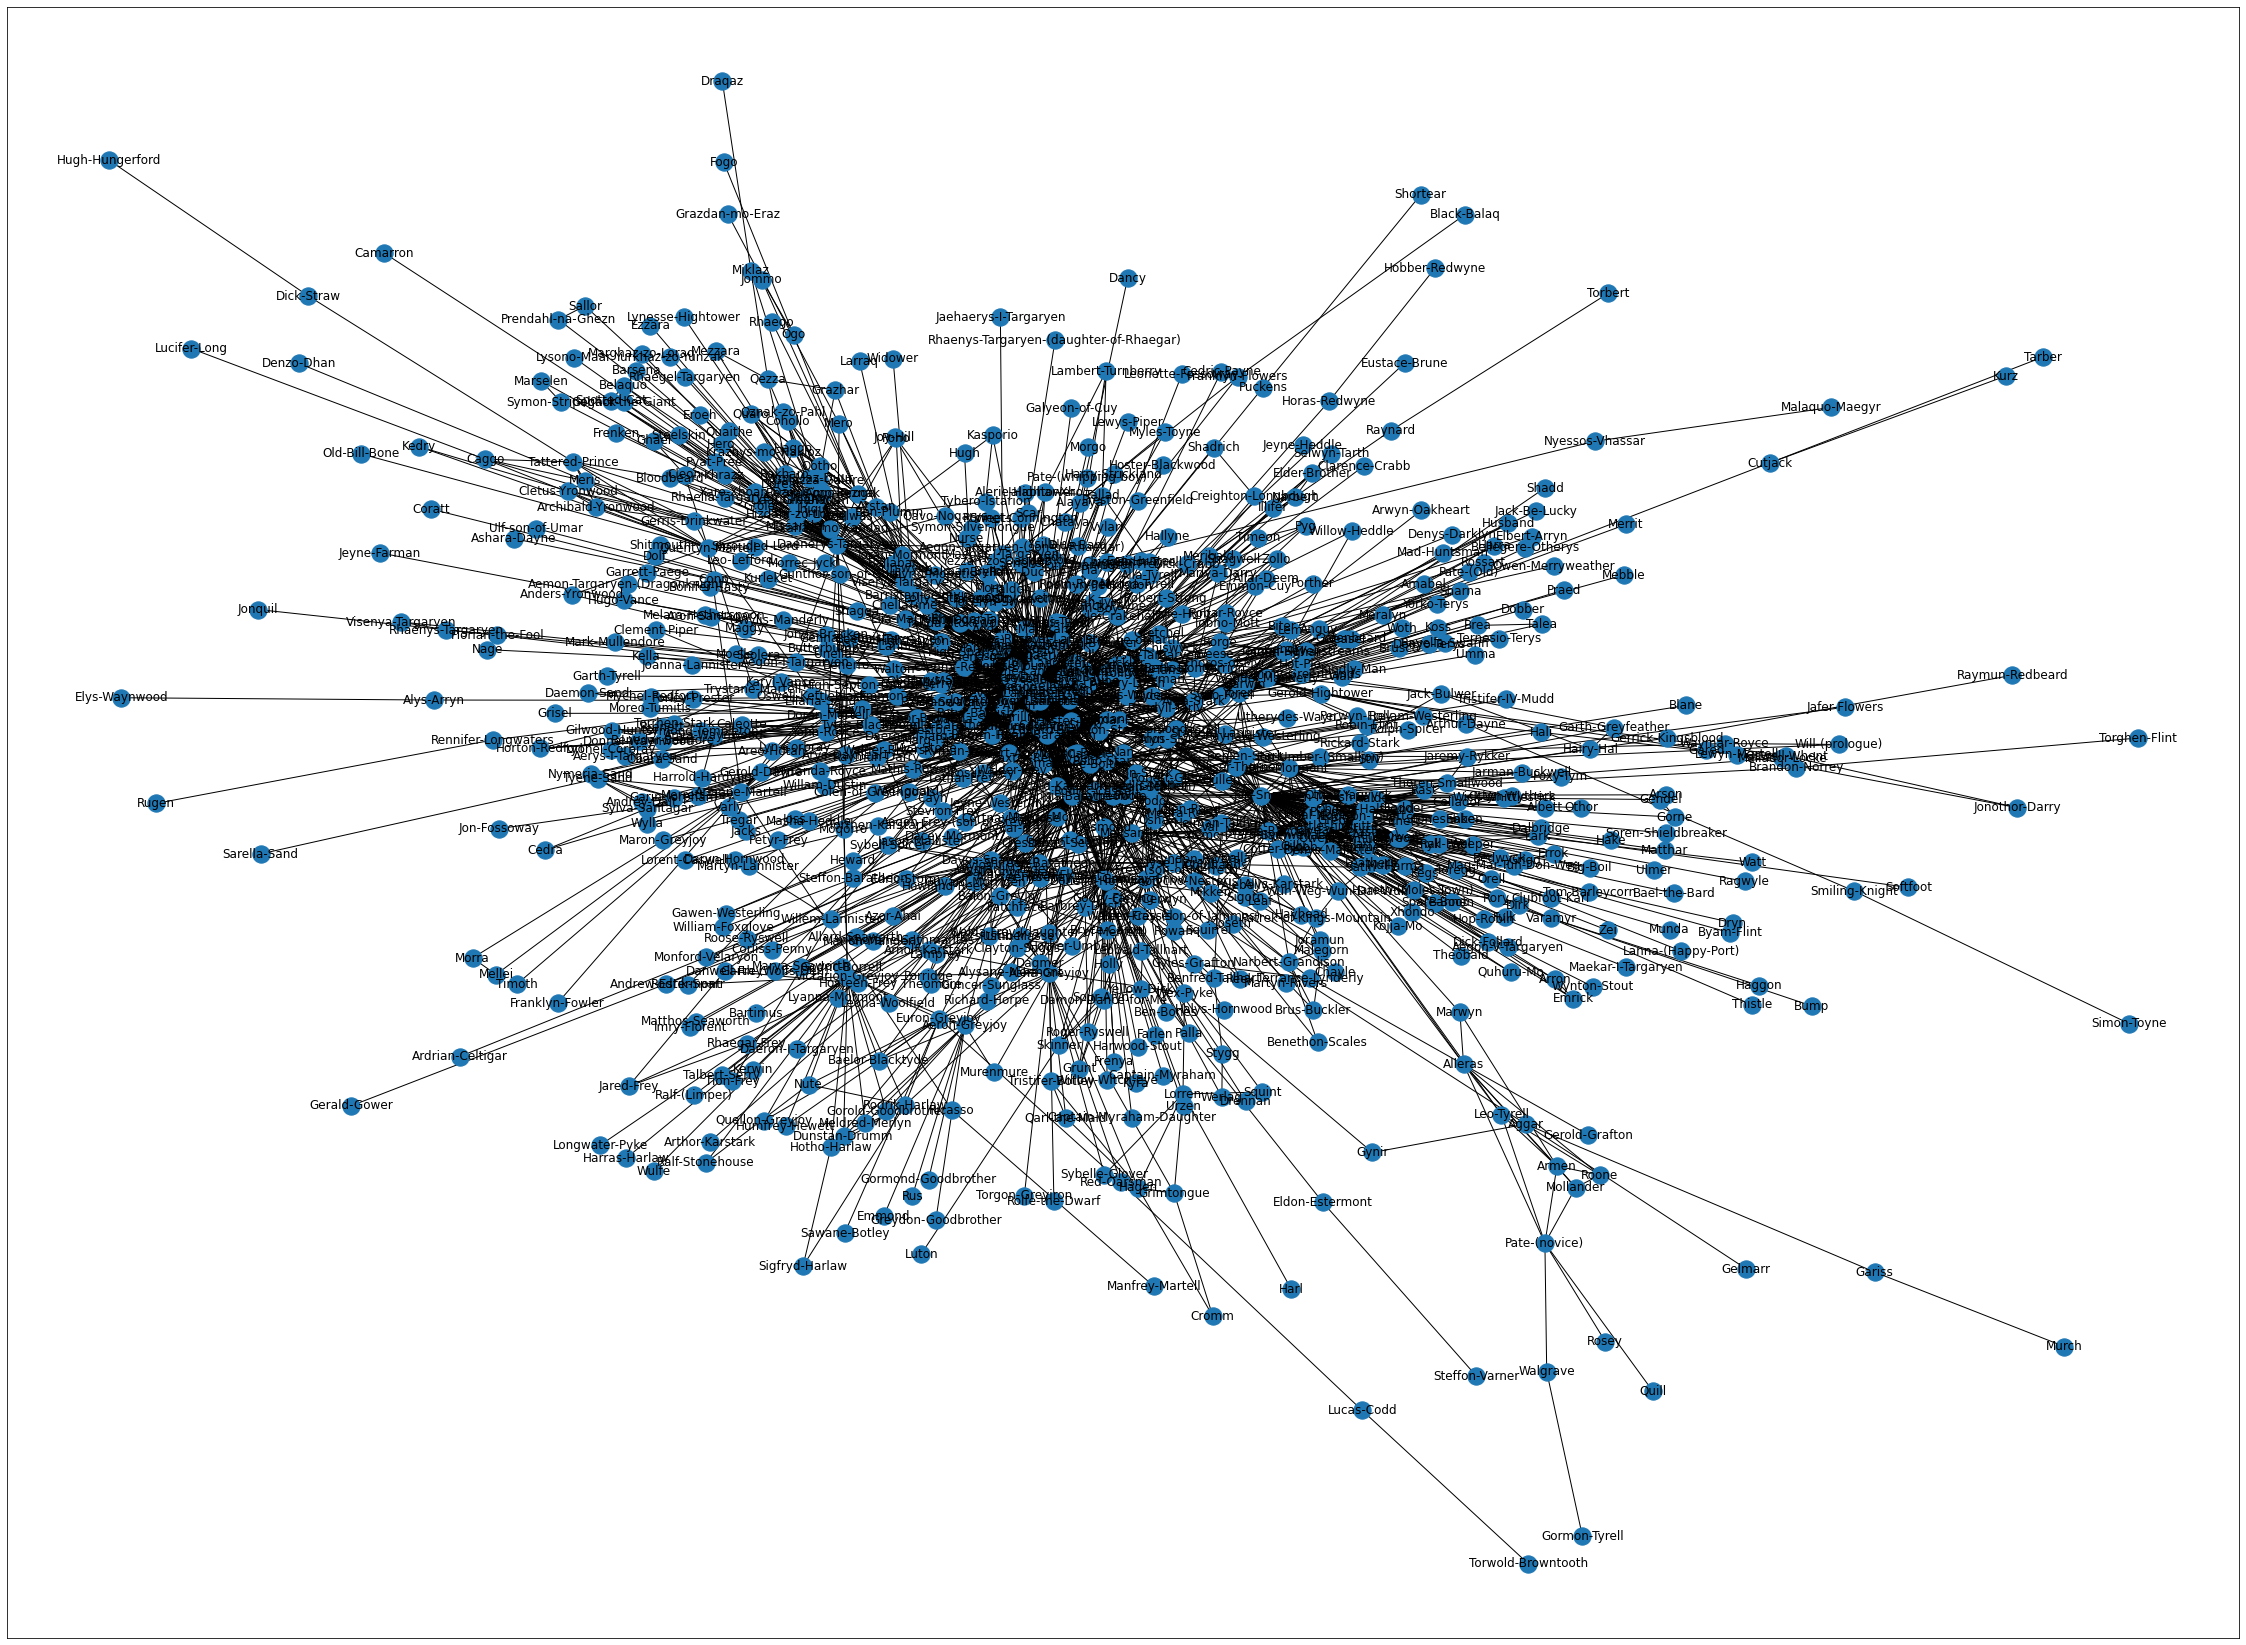

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(40,30))
nx.draw_networkx(df, with_labels=True)

### 2. Identify the most important character. Importance is defined based on the degree of the node 

In [1]:
import networkx as nx
import pandas as pd

In [21]:
book = pd.read_csv(r"E:\Mtech\Sem 1\21DS603-Data Stru\Assignment\asoiaf-all-edges.csv")

In [3]:
G_book = nx.Graph()

In [4]:
for _, edge in book.iterrows():
    G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])

In [7]:
books = [G_book]
deg_cen_book = nx.degree_centrality(books[0])

In [14]:
sorted_deg_cen_book = sorted(deg_cen_book.items(), key=lambda x:x[1], reverse=True)[0:1]

In [16]:
print("Book ", sorted_deg_cen_book)

Book  [('Tyrion-Lannister', 0.15345911949685534)]


### 3. Find out the shortest path between the characters Addam-Marbrand and Ysilla. The shortest path is used to identify the closeness of two characters in the book. 

In [13]:
import csv
from collections import defaultdict


class Graph():
    def __init__(self):
        self.edges = defaultdict(list)
        self.weights = {}

    def add_edge(self, from_node, to_node, weight):

        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.weights[(from_node, to_node)] = weight
        self.weights[(to_node, from_node)] = weight


def dijsktra(graph, initial, end):

    shortest_paths = {initial: (None, 0)}
    current_node = initial
    visited = set()

    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)
                                   ] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)

        next_destinations = {
            node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destinations,
                           key=lambda k: next_destinations[k][1])

    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node

    path = path[::-1]
    return path


graph = Graph()


fields = []
rows = []
with open(r"E:\Mtech\Sem 1\21DS603-Data Stru\Assignment\asoiaf-all-edges.csv" ) as f:
    csvreader = csv.reader(f)

    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)


nodes = set()

[nodes.add(i[0]) for i in rows]
[nodes.add(i[1]) for i in rows]

print("Total Nodes", len(nodes))
key = list(nodes)
kkey = {key[i]: i for i in range(len(key))}

edges = [(i[0], i[1], int(i[-1])) for i in rows]


for edge in edges:
    graph.add_edge(*edge)


print('Output')
print(dijsktra(graph, 'Addam-Marbrand', 'Ysilla'))

Total Nodes 796
Output
['Addam-Marbrand', 'Tywin-Lannister', 'Aegon-Targaryen-(son-of-Rhaegar)', 'Ysilla']


### 4. Obtain the minimum spanning tree for the graph. 

In [ ]:
class Graph:
    def __init__(self, vertex):
        self.V = vertex
        self.graph = []

    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])


    def search(self, parent, i):
        if parent[i] == i:
            return i
        return self.search(parent, parent[i])

    def apply_union(self, parent, rank, x, y):
        xroot = self.search(parent, x)
        yroot = self.search(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

 
    def kruskal(self):
        result = []
        i, e = 0, 0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.search(parent, u)
            y = self.search(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
        for u, v, weight in result:
            print("Edge:",u, v,end =" ")
            print("-",weight)




graph = Graph()


fields = []
rows = []
with open(r"E:\Mtech\Sem 1\21DS603-Data Stru\Assignment\asoiaf-all-edges.csv" ) as f:
    csvreader = csv.reader(f)

    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)


nodes = set()

[nodes.add(i[0]) for i in rows]
[nodes.add(i[1]) for i in rows]

print("Total Nodes", len(nodes))
key = list(nodes)
kkey = {key[i]: i for i in range(len(key))}

edges = [(i[0], i[1], int(i[-1])) for i in rows]


for edge in edges:
    graph.add_edge(*edge)

g.kruskal()
